In [1]:
from astropy.table import Table, vstack
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [24]:
dr14 = Table.read('allStar-l31c.2.fits', hdu=1)


In [25]:
ok = (dr14['LOCATION_ID'] > 5067) & (dr14['LOCATION_ID'] < 5069)
ok2 = (dr14['LOCATION_ID'] > 5130) & (dr14['LOCATION_ID'] < 5132)

In [28]:
pal5_a = dr14[ok]
pal5_b = dr14[ok2]

pal5 = vstack([pal5_a, pal5_b])
#pal5
#pal5_a.write('pal5_a.fits')

In [29]:
target_a = (pal5_a['APOGEE2_TARGET1'] & 2**19 != 0)
target_b = (pal5_b['APOGEE2_TARGET1'] & 2**19 != 0)

In [30]:
#pal5_b.write('pal5_b.fits')

In [31]:
candidates_a = pal5_a[target_a]


In [32]:
candidates_b = pal5_b[target_b]
#candidates_b.write('candidates_b.fits')

In [33]:
y = dr14['DEC'][ok]
x = dr14['RA'][ok]
y2 = dr14['DEC'][ok2]
x2 = dr14['RA'][ok2]

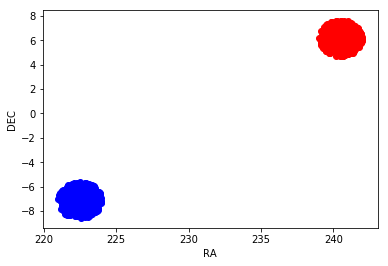

In [34]:
plt.scatter(x,y,color='b')
plt.scatter(x2,y2,color='r')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.show()


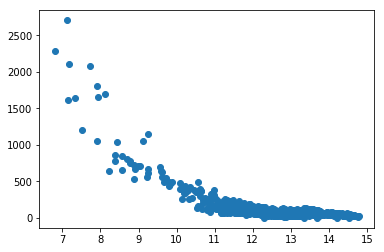

In [35]:
plt.scatter(pal5['H'],pal5['SNREV'])
plt.show()

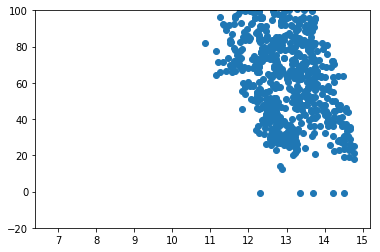

In [36]:
plt.scatter(pal5['H'],pal5['SNREV'])
plt.ylim(-20,100)
plt.show()

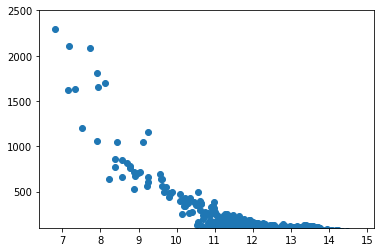

In [37]:
plt.scatter(pal5['H'],pal5['SNREV'])
plt.ylim(100,2500)
plt.show()

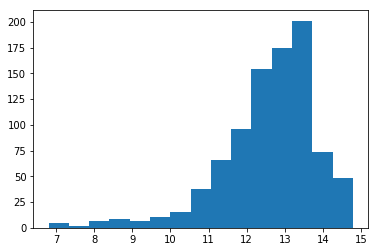

In [38]:
plt.hist(pal5['H'], bins=15)
plt.show()

In [39]:
pal5_a

APSTAR_ID,TARGET_ID,ASPCAP_ID,FILE,APOGEE_ID,TELESCOPE,LOCATION_ID,FIELD,J,J_ERR,H,H_ERR,K,K_ERR,RA,DEC,GLON,GLAT,APOGEE_TARGET1,APOGEE_TARGET2,APOGEE_TARGET3,TARGFLAGS,SURVEY,NINST [3],NVISITS,COMBTYPE,COMMISS,SNR,STARFLAG,STARFLAGS,ANDFLAG,ANDFLAGS,VHELIO_AVG,VSCATTER,VERR,VERR_MED,OBSVHELIO_AVG,OBSVSCATTER,OBSVERR,OBSVERR_MED,SYNTHVHELIO_AVG,SYNTHVSCATTER,SYNTHVERR,SYNTHVERR_MED,RV_TEFF,RV_LOGG,RV_FEH,RV_ALPHA,RV_CARB,RV_CCFWHM,RV_AUTOFWHM,SYNTHSCATTER,STABLERV_CHI2 [2],STABLERV_RCHI2 [2],CHI2_THRESHOLD [2],STABLERV_CHI2_PROB [2],APOGEE2_TARGET1,APOGEE2_TARGET2,APOGEE2_TARGET3,MEANFIB,SIGFIB,SNREV,APSTAR_VERSION,ASPCAP_VERSION,RESULTS_VERSION,EXTRATARG,MIN_H,MAX_H,MIN_JK,MAX_JK,PARAM [9],FPARAM [9],"PARAM_COV [9,9]","FPARAM_COV [9,9]",TEFF,TEFF_ERR,LOGG,LOGG_ERR,VMICRO,VMACRO,VSINI,M_H,M_H_ERR,ALPHA_M,ALPHA_M_ERR,ASPCAP_CHI2,ASPCAP_CLASS,ASPCAPFLAG,ASPCAPFLAGS,PARAMFLAG [9],FELEM [26],FELEM_ERR [26],X_H [26],X_H_ERR [26],X_M [26],X_M_ERR [26],C_FE,CI_FE,N_FE,O_FE,NA_FE,MG_FE,AL_FE,SI_FE,P_FE,S_FE,K_FE,CA_FE,TI_FE,TIII_FE,V_FE,CR_FE,MN_FE,FE_H,CO_FE,NI_FE,CU_FE,GE_FE,RB_FE,Y_FE,ND_FE,C_FE_ERR,CI_FE_ERR,N_FE_ERR,O_FE_ERR,NA_FE_ERR,MG_FE_ERR,AL_FE_ERR,SI_FE_ERR,P_FE_ERR,S_FE_ERR,K_FE_ERR,CA_FE_ERR,TI_FE_ERR,TIII_FE_ERR,V_FE_ERR,CR_FE_ERR,MN_FE_ERR,FE_H_ERR,CO_FE_ERR,NI_FE_ERR,CU_FE_ERR,GE_FE_ERR,RB_FE_ERR,Y_FE_ERR,ND_FE_ERR,C_FE_FLAG,CI_FE_FLAG,N_FE_FLAG,O_FE_FLAG,NA_FE_FLAG,MG_FE_FLAG,AL_FE_FLAG,SI_FE_FLAG,P_FE_FLAG,S_FE_FLAG,K_FE_FLAG,CA_FE_FLAG,TI_FE_FLAG,TIII_FE_FLAG,V_FE_FLAG,CR_FE_FLAG,MN_FE_FLAG,FE_H_FLAG,CO_FE_FLAG,NI_FE_FLAG,CU_FE_FLAG,GE_FE_FLAG,RB_FE_FLAG,Y_FE_FLAG,ND_FE_FLAG,ELEM_CHI2 [26],ELEMFLAG [26],REDUCTION_ID,SRC_H,WASH_M,WASH_M_ERR,WASH_T2,WASH_T2_ERR,DDO51,DDO51_ERR,IRAC_3_6,IRAC_3_6_ERR,IRAC_4_5,IRAC_4_5_ERR,IRAC_5_8,IRAC_5_8_ERR,IRAC_8_0,IRAC_8_0_ERR,WISE_4_5,WISE_4_5_ERR,TARG_4_5,TARG_4_5_ERR,AK_TARG,AK_TARG_METHOD,AK_WISE,SFD_EBV,WASH_DDO51_GIANT_FLAG,WASH_DDO51_STAR_FLAG,PMRA,PMDEC,PM_SRC,ALL_VISITS,VISITS,ALL_VISIT_PK [50],VISIT_PK [50],"FPARAM_CLASS [23,9]",CHI2_CLASS [23]
bytes45,bytes34,bytes46,bytes38,bytes18,bytes8,int16,bytes16,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,int32,int32,int32,bytes140,bytes14,int32,int32,int32,int16,float32,int32,bytes165,int32,bytes74,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,float32,float32,float32,bytes5,bytes4,bytes6,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes5,int32,bytes183,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,float32,int32,bytes23,bytes12,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes17,float32,float32,int16,int16,float32,float32,bytes20,bytes845,bytes804,int32,int32,float32,float32
apogee.apo25m.s.stars.5068.2M14440155-0701494,5068.2M14440155-0701494,apogee.apo25m.s.l31c.2.5068.2M14440155-0701494,apStar-r8-2M14440155-0701494.fits,2M14440155-0701494,apo25m,5068,PAL5-1,14.534,0.038,14.008,0.042,14.057,0.073,221.006497,-7.030411,345.598270172,46.3049992978,0,0,0,"APOGEE2_WASH_NOCLASS,APOGEE2_STREAM_CANDIDATE,APOGEE2_COMMIS_SOUTH_SPEC",apogee2-manga,0 .. 19,19,1,0,40.894

In [40]:
pal5_b

APSTAR_ID,TARGET_ID,ASPCAP_ID,FILE,APOGEE_ID,TELESCOPE,LOCATION_ID,FIELD,J,J_ERR,H,H_ERR,K,K_ERR,RA,DEC,GLON,GLAT,APOGEE_TARGET1,APOGEE_TARGET2,APOGEE_TARGET3,TARGFLAGS,SURVEY,NINST [3],NVISITS,COMBTYPE,COMMISS,SNR,STARFLAG,STARFLAGS,ANDFLAG,ANDFLAGS,VHELIO_AVG,VSCATTER,VERR,VERR_MED,OBSVHELIO_AVG,OBSVSCATTER,OBSVERR,OBSVERR_MED,SYNTHVHELIO_AVG,SYNTHVSCATTER,SYNTHVERR,SYNTHVERR_MED,RV_TEFF,RV_LOGG,RV_FEH,RV_ALPHA,RV_CARB,RV_CCFWHM,RV_AUTOFWHM,SYNTHSCATTER,STABLERV_CHI2 [2],STABLERV_RCHI2 [2],CHI2_THRESHOLD [2],STABLERV_CHI2_PROB [2],APOGEE2_TARGET1,APOGEE2_TARGET2,APOGEE2_TARGET3,MEANFIB,SIGFIB,SNREV,APSTAR_VERSION,ASPCAP_VERSION,RESULTS_VERSION,EXTRATARG,MIN_H,MAX_H,MIN_JK,MAX_JK,PARAM [9],FPARAM [9],"PARAM_COV [9,9]","FPARAM_COV [9,9]",TEFF,TEFF_ERR,LOGG,LOGG_ERR,VMICRO,VMACRO,VSINI,M_H,M_H_ERR,ALPHA_M,ALPHA_M_ERR,ASPCAP_CHI2,ASPCAP_CLASS,ASPCAPFLAG,ASPCAPFLAGS,PARAMFLAG [9],FELEM [26],FELEM_ERR [26],X_H [26],X_H_ERR [26],X_M [26],X_M_ERR [26],C_FE,CI_FE,N_FE,O_FE,NA_FE,MG_FE,AL_FE,SI_FE,P_FE,S_FE,K_FE,CA_FE,TI_FE,TIII_FE,V_FE,CR_FE,MN_FE,FE_H,CO_FE,NI_FE,CU_FE,GE_FE,RB_FE,Y_FE,ND_FE,C_FE_ERR,CI_FE_ERR,N_FE_ERR,O_FE_ERR,NA_FE_ERR,MG_FE_ERR,AL_FE_ERR,SI_FE_ERR,P_FE_ERR,S_FE_ERR,K_FE_ERR,CA_FE_ERR,TI_FE_ERR,TIII_FE_ERR,V_FE_ERR,CR_FE_ERR,MN_FE_ERR,FE_H_ERR,CO_FE_ERR,NI_FE_ERR,CU_FE_ERR,GE_FE_ERR,RB_FE_ERR,Y_FE_ERR,ND_FE_ERR,C_FE_FLAG,CI_FE_FLAG,N_FE_FLAG,O_FE_FLAG,NA_FE_FLAG,MG_FE_FLAG,AL_FE_FLAG,SI_FE_FLAG,P_FE_FLAG,S_FE_FLAG,K_FE_FLAG,CA_FE_FLAG,TI_FE_FLAG,TIII_FE_FLAG,V_FE_FLAG,CR_FE_FLAG,MN_FE_FLAG,FE_H_FLAG,CO_FE_FLAG,NI_FE_FLAG,CU_FE_FLAG,GE_FE_FLAG,RB_FE_FLAG,Y_FE_FLAG,ND_FE_FLAG,ELEM_CHI2 [26],ELEMFLAG [26],REDUCTION_ID,SRC_H,WASH_M,WASH_M_ERR,WASH_T2,WASH_T2_ERR,DDO51,DDO51_ERR,IRAC_3_6,IRAC_3_6_ERR,IRAC_4_5,IRAC_4_5_ERR,IRAC_5_8,IRAC_5_8_ERR,IRAC_8_0,IRAC_8_0_ERR,WISE_4_5,WISE_4_5_ERR,TARG_4_5,TARG_4_5_ERR,AK_TARG,AK_TARG_METHOD,AK_WISE,SFD_EBV,WASH_DDO51_GIANT_FLAG,WASH_DDO51_STAR_FLAG,PMRA,PMDEC,PM_SRC,ALL_VISITS,VISITS,ALL_VISIT_PK [50],VISIT_PK [50],"FPARAM_CLASS [23,9]",CHI2_CLASS [23]
bytes45,bytes34,bytes46,bytes38,bytes18,bytes8,int16,bytes16,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,int32,int32,int32,bytes140,bytes14,int32,int32,int32,int16,float32,int32,bytes165,int32,bytes74,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,float32,float32,float32,bytes5,bytes4,bytes6,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes5,int32,bytes183,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,float32,int32,bytes23,bytes12,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes17,float32,float32,int16,int16,float32,float32,bytes20,bytes845,bytes804,int32,int32,float32,float32
apogee.apo25m.s.stars.5131.2M15560113+0610457,5131.2M15560113+0610457,apogee.apo25m.s.l31c.2.5131.2M15560113+0610457,apStar-r8-2M15560113+0610457.fits,2M15560113+0610457,apo25m,5131,PAL5-2,13.287,0.035,12.838,0.04,12.781,0.03,239.004746,6.179385,15.9973085826,41.4612695613,0,0,0,"APOGEE2_WASH_NOCLASS,APOGEE2_STREAM_CANDIDATE",apogee2-manga,0 .. 6,6,1,0,77.6731,2048,PERSIST_LOW,0,,-128.756,

In [41]:
candidates_a

APSTAR_ID,TARGET_ID,ASPCAP_ID,FILE,APOGEE_ID,TELESCOPE,LOCATION_ID,FIELD,J,J_ERR,H,H_ERR,K,K_ERR,RA,DEC,GLON,GLAT,APOGEE_TARGET1,APOGEE_TARGET2,APOGEE_TARGET3,TARGFLAGS,SURVEY,NINST [3],NVISITS,COMBTYPE,COMMISS,SNR,STARFLAG,STARFLAGS,ANDFLAG,ANDFLAGS,VHELIO_AVG,VSCATTER,VERR,VERR_MED,OBSVHELIO_AVG,OBSVSCATTER,OBSVERR,OBSVERR_MED,SYNTHVHELIO_AVG,SYNTHVSCATTER,SYNTHVERR,SYNTHVERR_MED,RV_TEFF,RV_LOGG,RV_FEH,RV_ALPHA,RV_CARB,RV_CCFWHM,RV_AUTOFWHM,SYNTHSCATTER,STABLERV_CHI2 [2],STABLERV_RCHI2 [2],CHI2_THRESHOLD [2],STABLERV_CHI2_PROB [2],APOGEE2_TARGET1,APOGEE2_TARGET2,APOGEE2_TARGET3,MEANFIB,SIGFIB,SNREV,APSTAR_VERSION,ASPCAP_VERSION,RESULTS_VERSION,EXTRATARG,MIN_H,MAX_H,MIN_JK,MAX_JK,PARAM [9],FPARAM [9],"PARAM_COV [9,9]","FPARAM_COV [9,9]",TEFF,TEFF_ERR,LOGG,LOGG_ERR,VMICRO,VMACRO,VSINI,M_H,M_H_ERR,ALPHA_M,ALPHA_M_ERR,ASPCAP_CHI2,ASPCAP_CLASS,ASPCAPFLAG,ASPCAPFLAGS,PARAMFLAG [9],FELEM [26],FELEM_ERR [26],X_H [26],X_H_ERR [26],X_M [26],X_M_ERR [26],C_FE,CI_FE,N_FE,O_FE,NA_FE,MG_FE,AL_FE,SI_FE,P_FE,S_FE,K_FE,CA_FE,TI_FE,TIII_FE,V_FE,CR_FE,MN_FE,FE_H,CO_FE,NI_FE,CU_FE,GE_FE,RB_FE,Y_FE,ND_FE,C_FE_ERR,CI_FE_ERR,N_FE_ERR,O_FE_ERR,NA_FE_ERR,MG_FE_ERR,AL_FE_ERR,SI_FE_ERR,P_FE_ERR,S_FE_ERR,K_FE_ERR,CA_FE_ERR,TI_FE_ERR,TIII_FE_ERR,V_FE_ERR,CR_FE_ERR,MN_FE_ERR,FE_H_ERR,CO_FE_ERR,NI_FE_ERR,CU_FE_ERR,GE_FE_ERR,RB_FE_ERR,Y_FE_ERR,ND_FE_ERR,C_FE_FLAG,CI_FE_FLAG,N_FE_FLAG,O_FE_FLAG,NA_FE_FLAG,MG_FE_FLAG,AL_FE_FLAG,SI_FE_FLAG,P_FE_FLAG,S_FE_FLAG,K_FE_FLAG,CA_FE_FLAG,TI_FE_FLAG,TIII_FE_FLAG,V_FE_FLAG,CR_FE_FLAG,MN_FE_FLAG,FE_H_FLAG,CO_FE_FLAG,NI_FE_FLAG,CU_FE_FLAG,GE_FE_FLAG,RB_FE_FLAG,Y_FE_FLAG,ND_FE_FLAG,ELEM_CHI2 [26],ELEMFLAG [26],REDUCTION_ID,SRC_H,WASH_M,WASH_M_ERR,WASH_T2,WASH_T2_ERR,DDO51,DDO51_ERR,IRAC_3_6,IRAC_3_6_ERR,IRAC_4_5,IRAC_4_5_ERR,IRAC_5_8,IRAC_5_8_ERR,IRAC_8_0,IRAC_8_0_ERR,WISE_4_5,WISE_4_5_ERR,TARG_4_5,TARG_4_5_ERR,AK_TARG,AK_TARG_METHOD,AK_WISE,SFD_EBV,WASH_DDO51_GIANT_FLAG,WASH_DDO51_STAR_FLAG,PMRA,PMDEC,PM_SRC,ALL_VISITS,VISITS,ALL_VISIT_PK [50],VISIT_PK [50],"FPARAM_CLASS [23,9]",CHI2_CLASS [23]
bytes45,bytes34,bytes46,bytes38,bytes18,bytes8,int16,bytes16,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,int32,int32,int32,bytes140,bytes14,int32,int32,int32,int16,float32,int32,bytes165,int32,bytes74,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,float32,float32,float32,bytes5,bytes4,bytes6,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes5,int32,bytes183,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,float32,int32,bytes23,bytes12,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes17,float32,float32,int16,int16,float32,float32,bytes20,bytes845,bytes804,int32,int32,float32,float32
apogee.apo25m.s.stars.5068.2M14440155-0701494,5068.2M14440155-0701494,apogee.apo25m.s.l31c.2.5068.2M14440155-0701494,apStar-r8-2M14440155-0701494.fits,2M14440155-0701494,apo25m,5068,PAL5-1,14.534,0.038,14.008,0.042,14.057,0.073,221.006497,-7.030411,345.598270172,46.3049992978,0,0,0,"APOGEE2_WASH_NOCLASS,APOGEE2_STREAM_CANDIDATE,APOGEE2_COMMIS_SOUTH_SPEC",apogee2-manga,0 .. 19,19,1,0,40.894

In [42]:
candidates_b

APSTAR_ID,TARGET_ID,ASPCAP_ID,FILE,APOGEE_ID,TELESCOPE,LOCATION_ID,FIELD,J,J_ERR,H,H_ERR,K,K_ERR,RA,DEC,GLON,GLAT,APOGEE_TARGET1,APOGEE_TARGET2,APOGEE_TARGET3,TARGFLAGS,SURVEY,NINST [3],NVISITS,COMBTYPE,COMMISS,SNR,STARFLAG,STARFLAGS,ANDFLAG,ANDFLAGS,VHELIO_AVG,VSCATTER,VERR,VERR_MED,OBSVHELIO_AVG,OBSVSCATTER,OBSVERR,OBSVERR_MED,SYNTHVHELIO_AVG,SYNTHVSCATTER,SYNTHVERR,SYNTHVERR_MED,RV_TEFF,RV_LOGG,RV_FEH,RV_ALPHA,RV_CARB,RV_CCFWHM,RV_AUTOFWHM,SYNTHSCATTER,STABLERV_CHI2 [2],STABLERV_RCHI2 [2],CHI2_THRESHOLD [2],STABLERV_CHI2_PROB [2],APOGEE2_TARGET1,APOGEE2_TARGET2,APOGEE2_TARGET3,MEANFIB,SIGFIB,SNREV,APSTAR_VERSION,ASPCAP_VERSION,RESULTS_VERSION,EXTRATARG,MIN_H,MAX_H,MIN_JK,MAX_JK,PARAM [9],FPARAM [9],"PARAM_COV [9,9]","FPARAM_COV [9,9]",TEFF,TEFF_ERR,LOGG,LOGG_ERR,VMICRO,VMACRO,VSINI,M_H,M_H_ERR,ALPHA_M,ALPHA_M_ERR,ASPCAP_CHI2,ASPCAP_CLASS,ASPCAPFLAG,ASPCAPFLAGS,PARAMFLAG [9],FELEM [26],FELEM_ERR [26],X_H [26],X_H_ERR [26],X_M [26],X_M_ERR [26],C_FE,CI_FE,N_FE,O_FE,NA_FE,MG_FE,AL_FE,SI_FE,P_FE,S_FE,K_FE,CA_FE,TI_FE,TIII_FE,V_FE,CR_FE,MN_FE,FE_H,CO_FE,NI_FE,CU_FE,GE_FE,RB_FE,Y_FE,ND_FE,C_FE_ERR,CI_FE_ERR,N_FE_ERR,O_FE_ERR,NA_FE_ERR,MG_FE_ERR,AL_FE_ERR,SI_FE_ERR,P_FE_ERR,S_FE_ERR,K_FE_ERR,CA_FE_ERR,TI_FE_ERR,TIII_FE_ERR,V_FE_ERR,CR_FE_ERR,MN_FE_ERR,FE_H_ERR,CO_FE_ERR,NI_FE_ERR,CU_FE_ERR,GE_FE_ERR,RB_FE_ERR,Y_FE_ERR,ND_FE_ERR,C_FE_FLAG,CI_FE_FLAG,N_FE_FLAG,O_FE_FLAG,NA_FE_FLAG,MG_FE_FLAG,AL_FE_FLAG,SI_FE_FLAG,P_FE_FLAG,S_FE_FLAG,K_FE_FLAG,CA_FE_FLAG,TI_FE_FLAG,TIII_FE_FLAG,V_FE_FLAG,CR_FE_FLAG,MN_FE_FLAG,FE_H_FLAG,CO_FE_FLAG,NI_FE_FLAG,CU_FE_FLAG,GE_FE_FLAG,RB_FE_FLAG,Y_FE_FLAG,ND_FE_FLAG,ELEM_CHI2 [26],ELEMFLAG [26],REDUCTION_ID,SRC_H,WASH_M,WASH_M_ERR,WASH_T2,WASH_T2_ERR,DDO51,DDO51_ERR,IRAC_3_6,IRAC_3_6_ERR,IRAC_4_5,IRAC_4_5_ERR,IRAC_5_8,IRAC_5_8_ERR,IRAC_8_0,IRAC_8_0_ERR,WISE_4_5,WISE_4_5_ERR,TARG_4_5,TARG_4_5_ERR,AK_TARG,AK_TARG_METHOD,AK_WISE,SFD_EBV,WASH_DDO51_GIANT_FLAG,WASH_DDO51_STAR_FLAG,PMRA,PMDEC,PM_SRC,ALL_VISITS,VISITS,ALL_VISIT_PK [50],VISIT_PK [50],"FPARAM_CLASS [23,9]",CHI2_CLASS [23]
bytes45,bytes34,bytes46,bytes38,bytes18,bytes8,int16,bytes16,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,int32,int32,int32,bytes140,bytes14,int32,int32,int32,int16,float32,int32,bytes165,int32,bytes74,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,float32,float32,float32,bytes5,bytes4,bytes6,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes5,int32,bytes183,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,float32,int32,bytes23,bytes12,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes17,float32,float32,int16,int16,float32,float32,bytes20,bytes845,bytes804,int32,int32,float32,float32
apogee.apo25m.s.stars.5131.2M15560113+0610457,5131.2M15560113+0610457,apogee.apo25m.s.l31c.2.5131.2M15560113+0610457,apStar-r8-2M15560113+0610457.fits,2M15560113+0610457,apo25m,5131,PAL5-2,13.287,0.035,12.838,0.04,12.781,0.03,239.004746,6.179385,15.9973085826,41.4612695613,0,0,0,"APOGEE2_WASH_NOCLASS,APOGEE2_STREAM_CANDIDATE",apogee2-manga,0 .. 6,6,1,0,77.6731,2048,PERSIST_LOW,0,,-128.756,

In [3]:
candidates_a_gaia = pd.read_csv('candidates_a_gaia.csv')
candidates_a_gaia

,angDist,ra_epoch2000,dec_epoch2000,errHalfMaj,errHalfMin,errPosAng,source_id,ra,ra_error,dec,...,WASH_DDO51_STAR_FLAG,PMRA,PMDEC,PM_SRC,ALL_VISITS,VISITS,ALL_VISIT_PK,VISIT_PK,FPARAM_CLASS,CHI2_CLASS
0,0.094703,221.006519,-7.030426,0.002,0.002,0,6330615428746790016,221.006477,0.0620,-7.030456,...,1,-2.9,1.0,UCAC4,"r8-8478-57122-014,r8-8478-57123-014,r8-8478-57...","r8-8478-57122-014,r8-8478-57123-014,r8-8478-57...",614374 614375 614376 614377 614378 614379 6143...,614374 614375 614376 614377 614378 614379 6143...,4902.2 4.2908 2.9802E-8 0.24494 0.0 0.0 -0.078...,4.131046 4.359332 6.696841 -9999.0 -9999.0 -99...
1,0.145318,221.197064,-7.206404,0.001,0.001,90,6330596908847749632,221.197017,0.0326,-7.206428,...,1,-7.7,-2.5,UCAC4,"r8-8923-57463-016,r8-8923-57499-016,r8-8923-57...","r8-8923-57463-016,r8-8923-57499-016,r8-8923-57...",614719 614720 614721 -1 -1 -1 -1 -1 -1 -1 -1 -...,614719 614720 614721 -1 -1 -1 -1 -1 -1 -1 -1 -...,5109.8 2.421 2.9802E-8 -1.6473 0.0 0.0 0.47461...,1.3577193 1.36226 1.6456217 1.3563757 -9999.0 ...
2,0.168956,221.402185,-6.563039,0.001,0.001,90,6330842306099176832,221.402171,0.0365,-6.563070,...,1,-0.3,-5.2,UCAC4,"r8-8478-57122-273,r8-8478-57123-273,r8-8478-57...","r8-8478-57122-273,r8-8478-57123-273,r8-8478-57...",615205 615206 615207 615208 615209 615210 6152...,615205 615206 615207 615208 615209 615210 6152...,4838.5 2.0186 2.9802E-8 -2.3414 0.0 0.0 0.4658...,1.1990381 1.2344401 1.7751293 -9999.0 -9999.0 ...
3,0.144434,221.476643,-6.416255,0.001,0.001,90,6336852820772018944,221.476437,0.0362,-6.416321,...,1,-45.1,-14.9,UCAC4,"r8-8968-57465-221,r8-8968-57503-275,r8-8968-57...","r8-8968-57465-221,r8-8968-57503-275,r8-8968-57...",615447 615448 615449 615450 615451 615452 6154...,615447 615448 615449 615450 615451 615452 6154...,4788.8 4.0981 2.9802E-8 -0.50202 0.0 0.0 0.174...,1.5738379 1.8612299 7.9102464 -9999.0 -9999.0 ...
4,0.114313,221.518751,-8.217885,0.002,0.002,90,6327385334167039488,221.518734,0.0622,-8.217913,...,1,-2.1,-7.0,UCAC4,"r8-8478-57122-120,r8-8478-57123-120,r8-8478-57...","r8-8478-57122-120,r8-8478-57123-120,r8-8478-57...",615562 615563 615564 615565 615566 615567 6155...,615562 615563 615564 615565 615566 615567 6155...,4945.2 2.6962 2.9802E-8 -0.51177 0.0 0.0 0.225...,1.5626798 1.6354979 3.338797 -9999.0 1.5444719...
5,0.007483,221.564605,-7.276829,0.001,0.001,90,6330543681317607808,221.564550,0.0342,-7.276768,...,1,-13.0,16.2,UCAC4,"r8-8478-57122-029,r8-8478-57123-029,r8-8478-57...","r8-8478-57122-029,r8-8478-57123-029,r8-8478-57...",615728 615729 615730 615731 615732 615733 6157...,615728 615729 615730 615731 615732 615733 6157...,5390.7 4.2381 2.9802E-8 -0.1056 0.0 0.0 0.1463...,2.3161676 2.2961485 8.363344 -9999.0 -9999.0 -...
6,0.049339,221.565637,-7.744052,0.001,0.001,90,6327511060744905344,221.565594,0.0265,-7.744091,...,1,-9.1,-6.4,UCAC4,"r8-8923-57463-112,r8-8923-57499-010,r8-8923-57...","r8-8923-57463-112,r8-8923-57499-010,r8-8923-57...",615739 615740 615741 -1 -1 -1 -1 -1 -1 -1 -1 -...,615739 615740 615741 -1 -1 -1 -1 -1 -1 -1 -1 -...,4884.0 2.9939 2.9802E-8 -0.65403 0.0 0.0 0.284...,1.1168659 1.1972532 3.1486907 -9999.0 1.106447...
7,0.205284,221.695206,-5.916625,0.001,0.001,90,6336906142790471936,221.695151,0.0335,-5.916673,...,1,-13.2,-10.4,UCAC4,"r8-8478-57122-298,r8-8478-57123-298,r8-8478-57...","r8-8478-57122-298,r8-8478-57123-298,r8-8478-57...",616099 616100 616101 616102 616103 616104 6161...,616099 616100 616101 616102 616103 616104 6161...,5615.9 4.3612 2.9802E-8 -0.10303 0.0 0.0 0.122...,2.042114 2.0248833 7.917536 -9999.0 -9999.0 -9...
8,0.119946,221.759599,-7.289600,0.002,0.002,0,6330554401556098432,221.759587,0.0562,-7.289628,...,1,-4.5,-0.4,UCAC4,"r8-8478-57122-007,r8-8478-57123-007,r8-8478-57...","r8-8478-57122-007,r8-8478-57123-007,r8-8478-57...",616263 616264 616265 616266 616267 616268 6162...,616263 616264 616265 616266 616267 616268 6162...,5279.2 3.8909 2.9802E-8 -0.49805 0.0 0.0 0.256...,1.958078 1.9606497 2.8440027 1.9586643 -9999.0...
9,0.2085

In [5]:
candidates_b_gaia = pd.read_csv('candidates_b_gaia.csv')
candidates_b_gaia

,angDist,ra_epoch2000,dec_epoch2000,errHalfMaj,errHalfMin,errPosAng,source_id,ra,ra_error,dec,...,WASH_DDO51_STAR_FLAG,PMRA,PMDEC,PM_SRC,ALL_VISITS,VISITS,ALL_VISIT_PK,VISIT_PK,FPARAM_CLASS,CHI2_CLASS
0,0.129618,239.004765,6.179415,0.001,0.001,0,4426905465815818880,239.004679,0.0282,6.179377,...,1,-15.0,-5.3,UCAC4,"r8-8634-57442-014,r8-8634-57445-014,r8-8634-57...","r8-8634-57442-014,r8-8634-57445-014,r8-8634-57...",662975 662976 662977 662978 662979 662980 -1 -...,662975 662976 662977 662978 662979 662980 -1 -...,5092.4 2.9533 2.9802E-8 -1.1563 0.0 0.0 0.2515...,1.179158 1.1841671 2.5665517 -9999.0 1.1796794...
1,0.019237,239.160123,5.781502,0.004,0.004,0,4426609731548943232,239.160128,0.1360,5.781301,...,1,-3.9,-24.5,UCAC4,r8-8636-57560-014,r8-8636-57560-014,663145 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...,663145 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...,4960.9 3.932 2.9802E-8 -0.37115 0.0 0.0 0.1764...,1.1894768 1.1967901 1.390785 1.1871293 -9999.0...
2,0.062599,239.232067,5.736049,0.001,0.001,90,4426596915366521984,239.232054,0.0254,5.735962,...,1,4.5,-25.2,UCAC4,r8-8636-57560-017,r8-8636-57560-017,663245 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...,663245 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...,5705.3 3.536 2.9802E-8 -1.7979 0.0 0.0 0.47681...,1.2229537 1.2227706 1.2729168 1.2235818 -9999....
3,0.174138,239.439417,5.266723,0.001,0.001,90,4426517441291608192,239.439402,0.0191,5.266688,...,1,-4.3,-8.3,UCAC4,r8-8636-57560-028,r8-8636-57560-028,663540 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...,663540 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...,4796.5 2.6801 2.9802E-8 -0.47203 0.0 0.0 0.259...,2.280342 2.536238 5.687743 2.2604766 -9999.0 -...
4,0.144640,239.446878,5.459969,0.016,0.014,90,4426537919695694080,239.446810,0.5459,5.460087,...,1,-9.5,23.3,UCAC4,r8-8636-57560-029,r8-8636-57560-029,663552 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...,663552 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...,4790.5 4.2114 2.9802E-8 -0.14796 0.0 0.0 0.110...,1.6379099 1.7647777 4.3507085 -9999.0 -9999.0 ...
5,0.270508,239.501159,6.615036,0.001,0.001,90,4426947831373415680,239.501053,0.0268,6.614947,...,1,-23.9,-22.2,UCAC4,r8-8636-57560-219,r8-8636-57560-219,663663 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...,663663 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...,5193.8 4.0594 2.9802E-8 -0.83145 0.0 0.0 0.293...,1.0990565 1.0988388 1.3454885 -9999.0 -9999.0 ...
6,0.054313,239.512469,5.366888,0.002,0.001,90,4426524313239386112,239.512438,0.0595,5.366873,...,1,-3.9,3.1,UCAC4,"r8-8634-57442-029,r8-8634-57445-116,r8-8634-57...","r8-8634-57442-029,r8-8634-57445-116,r8-8634-57...",663691 663692 663693 663694 663695 663696 6636...,663691 663692 663693 663694 663695 663696 6636...,4706.0 3.1969 2.9802E-8 -0.37285 0.0 0.0 0.052...,1.4120822 1.4942732 1.7192142 -9999.0 1.324372...
7,0.138103,239.575505,5.646315,0.001,0.000,90,4426635776229464576,239.575522,0.0176,5.646320,...,1,5.9,4.5,UCAC4,"r8-8635-57443-029,r8-8635-57470-005,r8-8640-57...","r8-8635-57443-029,r8-8635-57470-005,r8-8640-57...",663813 663814 663815 -1 -1 -1 -1 -1 -1 -1 -1 -...,663813 663814 663815 -1 -1 -1 -1 -1 -1 -1 -1 -...,4793.8 3.2702 2.9802E-8 0.11232 0.0 0.0 -0.027...,3.1446333 5.5876603 15.816122 2.9222677 -9999....
8,0.064969,239.697195,6.981763,0.002,0.001,0,4450994734788070912,239.697178,0.0463,6.981750,...,1,-1.4,1.8,UCAC4,"r8-8634-57442-276,r8-8634-57445-282,r8-8634-57...","r8-8634-57442-276,r8-8634-57445-282,r8-8634-57...",664046 664047 664048 664049 664050 664051 6640...,664046 664047 664048 664049 664050 664051 6640...,5139.4 3.7343 2.9802E-8 -0.34973 0.0 0.0 0.150...,1.1633302 1.1722926 2.180821 -9999.0 -9999.0 -...
9,0.077222,239.699126,6.861621,0.001,0.001,0,4450984048909428352,239.699080,0.0314,6.861571,...,1,-13.0,-12.6,UCAC4,"r8-8634-57442-239,r8-8634-57445-275,r8-8634-57...","r8-8634-57442-239,r8-8634-57445-275,r8-8634-57...",664053 664054 664055 -1 -1 -1 -1 -1 -1 -1 -1 -...,664053 664054 664055 -1 -1 -1 -1 -1 -1 -1 -1 -...,4869.0 2.2472 2.9802E-8 -1.8614 0.0 0.0 0.4623...,1

In [6]:
pal5a_gaia = pd.read_csv('pal5a_gaia.csv')
pal5a_gaia

,angDist,ra_epoch2000,dec_epoch2000,errHalfMaj,errHalfMin,errPosAng,source_id,ra,ra_error,dec,...,WASH_DDO51_STAR_FLAG,PMRA,PMDEC,PM_SRC,ALL_VISITS,VISITS,ALL_VISIT_PK,VISIT_PK,FPARAM_CLASS,CHI2_CLASS
0,0.094703,221.006519,-7.030426,0.002,0.002,0,6330615428746790016,221.006477,0.0620,-7.030456,...,1,-2.9,1.0,UCAC4,"r8-8478-57122-014,r8-8478-57123-014,r8-8478-57...","r8-8478-57122-014,r8-8478-57123-014,r8-8478-57...",614374 614375 614376 614377 614378 614379 6143...,614374 614375 614376 614377 614378 614379 6143...,4902.2 4.2908 2.9802E-8 0.24494 0.0 0.0 -0.078...,4.131046 4.359332 6.696841 -9999.0 -9999.0 -99...
1,0.116215,221.075502,-6.693648,0.001,0.001,0,6330835842173087744,221.075507,0.0441,-6.693638,...,1,3.1,3.4,UCAC4,"r8-8478-57122-214,r8-8478-57123-214,r8-8478-57...","r8-8478-57122-214,r8-8478-57123-214,r8-8478-57...",614478 614479 614480 614481 614482 614483 6144...,614478 614479 614480 614481 614482 614483 6144...,5995.4 3.8489 2.9802E-8 -0.56345 0.0 0.0 0.072...,2.4521668 1.54846 16.912195 -9999.0 -9999.0 -9...
2,0.202875,221.126661,-7.051007,0.002,0.002,90,6330611855333957632,221.126637,0.0809,-7.051026,...,1,0.0,0.0,None,"r8-8478-57122-013,r8-8478-57123-013,r8-8478-57...","r8-8478-57122-013,r8-8478-57123-013,r8-8478-57...",614560 614561 614562 614563 614564 614565 6145...,614560 614561 614562 614563 614564 614565 6145...,5789.1 3.0638 2.9802E-8 -1.6133 0.0 0.0 0.2102...,3.1817055 2.9799569 3.354208 3.1837575 -9999.0...
3,0.109508,221.136829,-6.499440,0.001,0.001,90,6330857664902237312,221.136742,0.0276,-6.499443,...,1,0.0,0.0,none,"r8-9015-57505-226,r8-9015-57558-220","r8-9015-57505-226,r8-9015-57558-220",614589 614590 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1...,614589 614590 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1...,5290.3 4.4738 2.9802E-8 0.0074043 0.0 0.0 -0.0...,2.2115154 2.210243 7.242025 -9999.0 -9999.0 -9...
4,0.054929,221.170813,-7.193564,0.008,0.008,0,6330597733481537536,221.170819,0.2492,-7.193629,...,1,4.5,-5.1,UCAC4,"r8-8478-57122-016,r8-8478-57123-016,r8-8478-57...","r8-8478-57122-016,r8-8478-57123-016,r8-8478-57...",614624 614625 614626 614627 614628 614629 6146...,614624 614625 614626 614627 614628 614629 6146...,5994.3 4.0111 2.9802E-8 -0.27514 0.0 0.0 0.046...,3.5181148 1.6713215 23.539646 -9999.0 -9999.0 ...
5,0.182254,221.179675,-7.109423,0.002,0.002,90,6330610373569504000,221.179641,0.0720,-7.109448,...,1,-13.0,-10.8,UCAC4,"r8-8478-57122-018,r8-8478-57123-018,r8-8478-57...","r8-8478-57122-018,r8-8478-57123-018,r8-8478-57...",614649 614650 614651 614652 614653 614654 6146...,614649 614650 614651 614652 614653 614654 6146...,4961.8 3.0386 2.9802E-8 0.093196 0.0 0.0 0.084...,2.6050737 2.7694275 4.207654 2.5487661 -9999.0...
6,0.109286,221.188817,-6.618922,0.001,0.001,90,6330843165092638720,221.188793,0.0311,-6.618921,...,1,-4.3,1.9,UCAC4,"r8-8968-57465-214,r8-8968-57503-220,r8-8968-57...","r8-8968-57465-214,r8-8968-57503-220,r8-8968-57...",614701 614702 614703 614704 614705 614706 6147...,614701 614702 614703 614704 614705 614706 6147...,4775.0 2.8925 2.9802E-8 -0.70993 0.0 0.0 0.171...,4.387731 4.783216 11.140381 -9999.0 -9999.0 4....
7,0.145318,221.197064,-7.206404,0.001,0.001,90,6330596908847749632,221.197017,0.0326,-7.206428,...,1,-7.7,-2.5,UCAC4,"r8-8923-57463-016,r8-8923-57499-016,r8-8923-57...","r8-8923-57463-016,r8-8923-57499-016,r8-8923-57...",614719 614720 614721 -1 -1 -1 -1 -1 -1 -1 -1 -...,614719 614720 614721 -1 -1 -1 -1 -1 -1 -1 -1 -...,5109.8 2.421 2.9802E-8 -1.6473 0.0 0.0 0.47461...,1.3577193 1.36226 1.6456217 1.3563757 -9999.0 ...
8,0.083094,221.197487,-6.697396,0.001,0.001,90,6330833750524320256,221.197450,0.0259,-6.697421,...,1,0.0,0.0,none,"r8-8923-57463-213,r8-8923-57499-214,r8-8923-57...","r8-8923-57463-213,r8-8923-57499-214,r8-8923-57...",614726 614727 614728 -1 -1 -1 -1 -1 -1 -1 -1 -...,614726 614727 614728 -1 -1 -1 -1 -1 -1 -1 -1 -...,5338.3 4.1196 2.9802E-8 -0.23403 0.0 0.0 0.036...,2.4373617 2.4047503 5.001151 -9999.0 -9999.0 -...
9,0.224451,221.198795,-7.799752,0.003,0.003,0,6330421

In [7]:
pal5b_gaia = pd.read_csv('pal5b_gaia.csv')
pal5b_gaia

,angDist,ra_epoch2000,dec_epoch2000,errHalfMaj,errHalfMin,errPosAng,source_id,ra,ra_error,dec,...,WASH_DDO51_STAR_FLAG,PMRA,PMDEC,PM_SRC,ALL_VISITS,VISITS,ALL_VISIT_PK,VISIT_PK,FPARAM_CLASS,CHI2_CLASS
0,0.129618,239.004765,6.179415,0.001,0.001,0,4426905465815818880,239.004679,0.0282,6.179377,...,1,-15.0,-5.3,UCAC4,"r8-8634-57442-014,r8-8634-57445-014,r8-8634-57...","r8-8634-57442-014,r8-8634-57445-014,r8-8634-57...",662975 662976 662977 662978 662979 662980 -1 -...,662975 662976 662977 662978 662979 662980 -1 -...,5092.4 2.9533 2.9802E-8 -1.1563 0.0 0.0 0.2515...,1.179158 1.1841671 2.5665517 -9999.0 1.1796794...
1,0.082726,239.091278,6.114565,0.002,0.001,0,4426901067769296256,239.091261,0.0429,6.114529,...,1,0.0,0.0,none,"r8-8634-57442-013,r8-8634-57445-013,r8-8634-57...","r8-8634-57442-013,r8-8634-57445-013,r8-8634-57...",663060 663061 663062 663063 663064 663065 6630...,663060 663061 663062 663063 663064 663065 6630...,4998.0 2.7401 2.9802E-8 -0.50656 0.0 0.0 0.212...,1.3141654 1.3302094 1.7188184 1.3084887 -9999....
2,0.084199,239.143714,6.770641,0.001,0.001,90,4427007411159835136,239.143694,0.0235,6.770616,...,1,-5.5,-8.9,UCAC4,"r8-8635-57443-220,r8-8635-57470-226,r8-8640-57...","r8-8635-57443-220,r8-8635-57470-226,r8-8640-57...",663126 663127 663128 -1 -1 -1 -1 -1 -1 -1 -1 -...,663126 663127 663128 -1 -1 -1 -1 -1 -1 -1 -1 -...,4794.2 2.6684 2.9802E-8 -0.73481 0.0 0.0 0.299...,1.3403246 1.4781891 3.899061 -9999.0 -9999.0 1...
3,0.019237,239.160123,5.781502,0.004,0.004,0,4426609731548943232,239.160128,0.1360,5.781301,...,1,-3.9,-24.5,UCAC4,r8-8636-57560-014,r8-8636-57560-014,663145 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...,663145 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...,4960.9 3.932 2.9802E-8 -0.37115 0.0 0.0 0.1764...,1.1894768 1.1967901 1.390785 1.1871293 -9999.0...
4,0.092760,239.163478,5.600787,0.001,0.001,0,4426591280369420672,239.163444,0.0213,5.600783,...,1,-4.2,4.0,UCAC4,r8-8636-57560-027,r8-8636-57560-027,663146 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...,663146 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...,4460.5 2.4645 2.9802E-8 -0.27394 0.0 0.0 0.163...,2.5122914 3.8430853 4.468379 2.4308603 -9999.0...
5,0.125980,239.174385,5.864035,0.001,0.001,90,4426611415176129664,239.174359,0.0279,5.864000,...,1,4.2,-30.9,UCAC4,"r8-8634-57442-017,r8-8634-57445-017,r8-8634-57...","r8-8634-57442-017,r8-8634-57445-017,r8-8634-57...",663160 663161 663162 663163 663164 663165 -1 -...,663160 663161 663162 663163 663164 663165 -1 -...,5031.2 2.7687 2.9802E-8 -0.87007 0.0 0.0 0.291...,1.2577056 1.2780858 2.3391604 1.2441622 -9999....
6,0.125737,239.220356,6.445594,0.001,0.001,90,4426950545792694400,239.220344,0.0240,6.445559,...,1,0.5,-7.0,UCAC4,"r8-8634-57442-224,r8-8634-57445-224,r8-8634-57...","r8-8634-57442-224,r8-8634-57445-224,r8-8634-57...",663215 663216 663217 663218 663219 -1 -1 -1 -1...,663215 663216 663217 663218 663219 -1 -1 -1 -1...,4999.3 2.6397 2.9802E-8 -0.64064 0.0 0.0 0.327...,1.0687374 1.1185129 3.1193206 -9999.0 -9999.0 ...
7,0.153902,239.221306,5.999003,0.001,0.001,90,4426710852257851648,239.221237,0.0229,5.998967,...,1,0.0,0.0,none,"r8-8634-57442-015,r8-8634-57445-015,r8-8634-57...","r8-8634-57442-015,r8-8634-57445-015,r8-8634-57...",663220 663221 663222 -1 -1 -1 -1 -1 -1 -1 -1 -...,663220 663221 663222 -1 -1 -1 -1 -1 -1 -1 -1 -...,4846.9 2.8001 2.9802E-8 -0.24722 0.0 0.0 0.057...,1.3879697 1.5262653 2.9881334 1.3695567 -9999....
8,0.062599,239.232067,5.736049,0.001,0.001,90,4426596915366521984,239.232054,0.0254,5.735962,...,1,4.5,-25.2,UCAC4,r8-8636-57560-017,r8-8636-57560-017,663245 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...,663245 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...,5705.3 3.536 2.9802E-8 -1.7979 0.0 0.0 0.47681...,1.2229537 1.2227706 1.2729168 1.2235818 -9999....
9,0.124518,239.252583,5.543202,0.001,0.001,0,4426589871620133888,239.252612,0.0258,5.543144,...,1,0.0,0.0,none,"r8-8635-57443-009,r8-8635-57470-028,r8-8640-57...","r8-8635-57443-009,r8-8635-57470-028,r8-8640-57...",663265 663266 663267 -1 -1 